In [ ]:
# Ch10-6 - Visualizing Phylogenetic data [Updated to use raxml-ng]

In [ ]:
# 30 & 31.  Load phylogenetic data and Draw Trees
from copy import deepcopy
from Bio import Phylo

# Define the correct RAxML-NG output files
best_tree_file = "ebola_tree.raxml.bestTreeCollapsed"  # Best ML tree
simplified_tree_file = "ebola_tree.raxml.support"  # Bootstrap-supported tree (if available)

# Read the best ML tree
ebola_tree = Phylo.read(best_tree_file, "newick")
ebola_tree.name = "Ebolavirus Tree"

# Read the simplified (support) tree (if available)
try:
    ebola_simple_tree = Phylo.read(simplified_tree_file, "newick")
    ebola_simple_tree.name = "Ebolavirus Simplified Tree"
except FileNotFoundError:
    print(f"Warning: Simplified tree '{simplified_tree_file}' not found. Using a copy of the main tree instead.")
    ebola_simple_tree = deepcopy(ebola_tree)

# Print tree structures for verification
Phylo.draw_ascii(ebola_tree)
Phylo.draw_ascii(ebola_simple_tree)


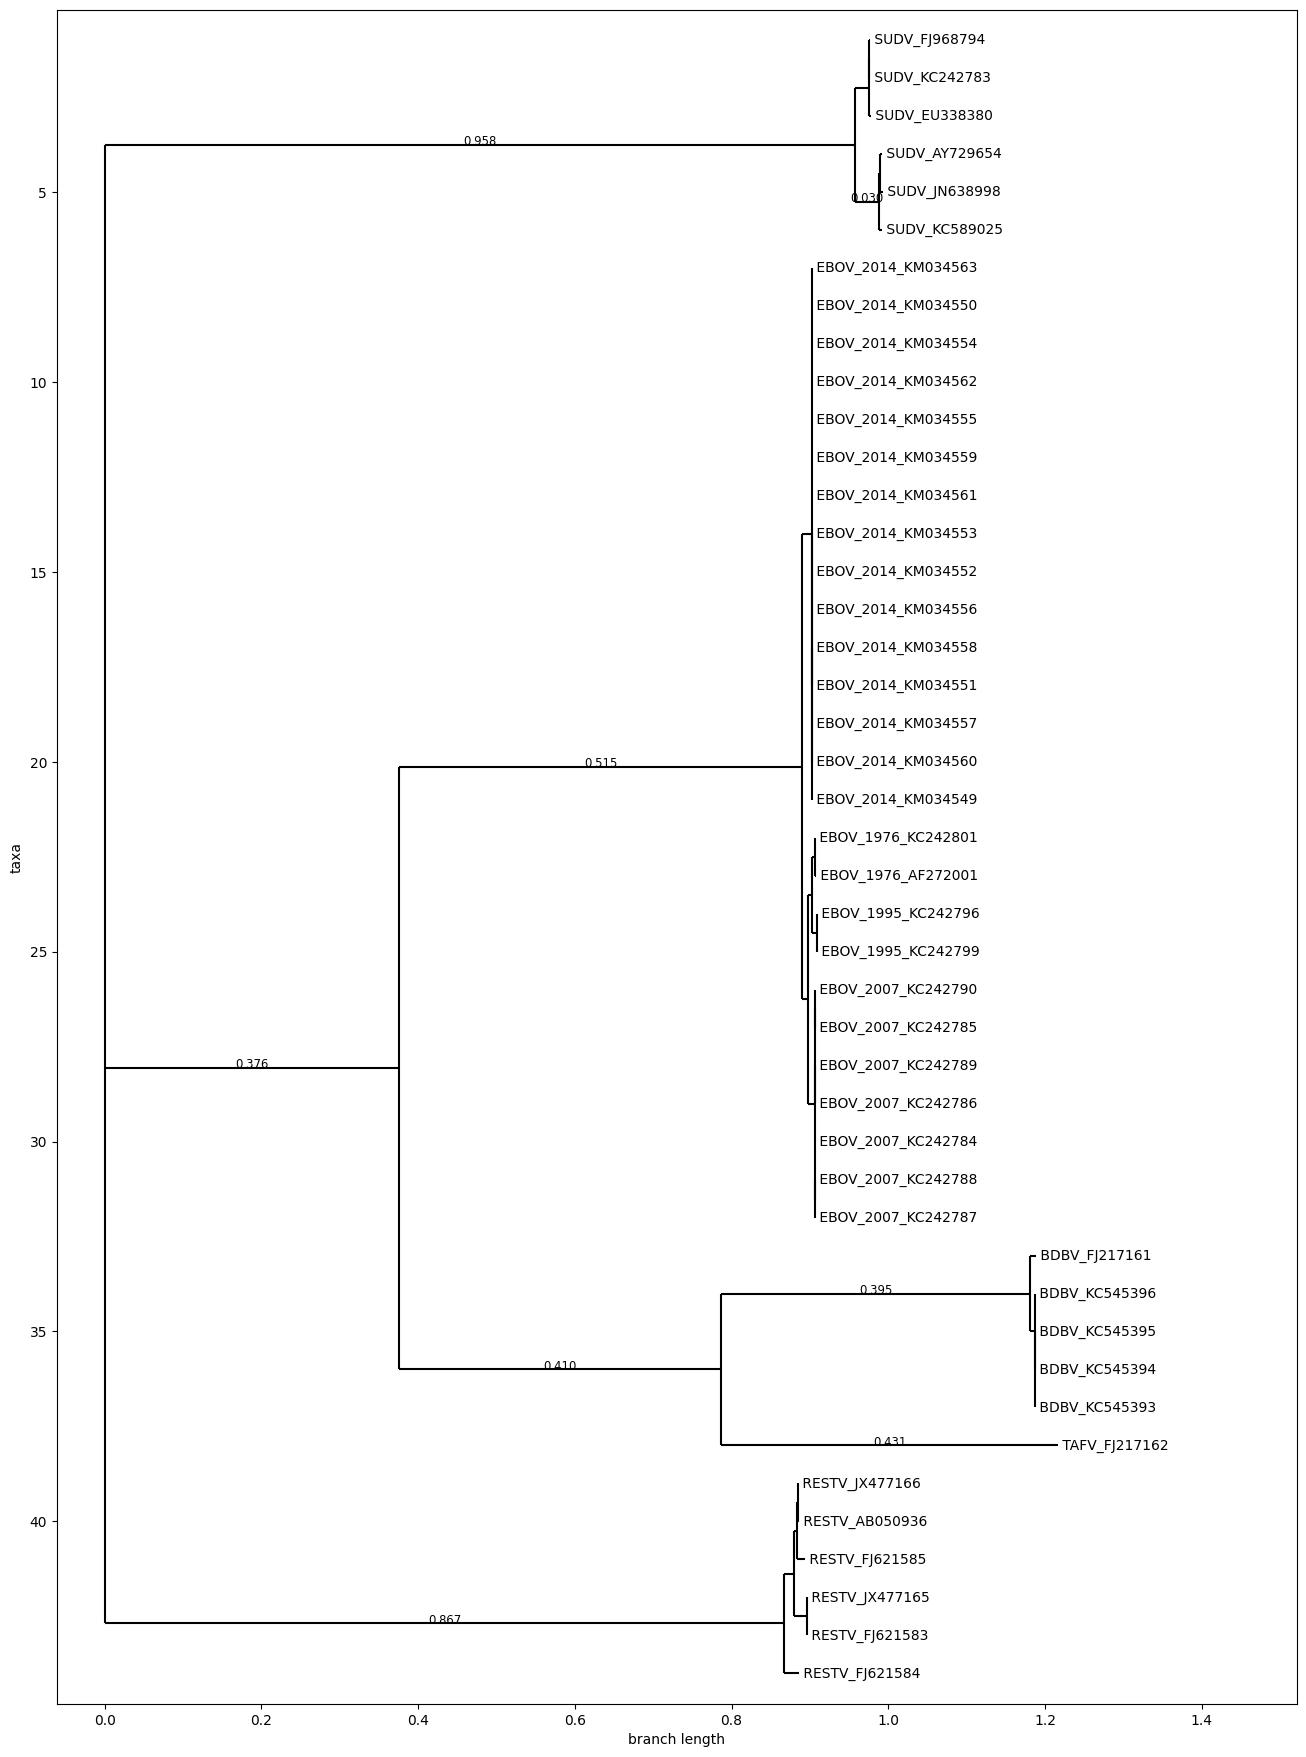

In [5]:
# 32.  Bio.Phylo [Updated]
import matplotlib.pyplot as plt
from Bio import Phylo

# Define the RAxML-NG output file
simplified_tree_file = "ebola_tree.raxml.bestTreeCollapsed"  # Previous output of raxml-ng

# Read the tree (RAxML-NG outputs trees in Newick format)
ebola_simple_tree = Phylo.read(simplified_tree_file, "newick")

# Create a figure and axis
fig = plt.figure(figsize=(16, 22))
ax = fig.add_subplot(111)

# Function to conditionally label branches
def label_branches(clade):
    if clade.branch_length and clade.branch_length > 0.02:
        return f"{clade.branch_length:.3f}"  # Format to 3 decimal places
    return None

# Draw the tree with branch labels
Phylo.draw(ebola_simple_tree, branch_labels=label_branches, axes=ax)

# Show the plot
plt.show()


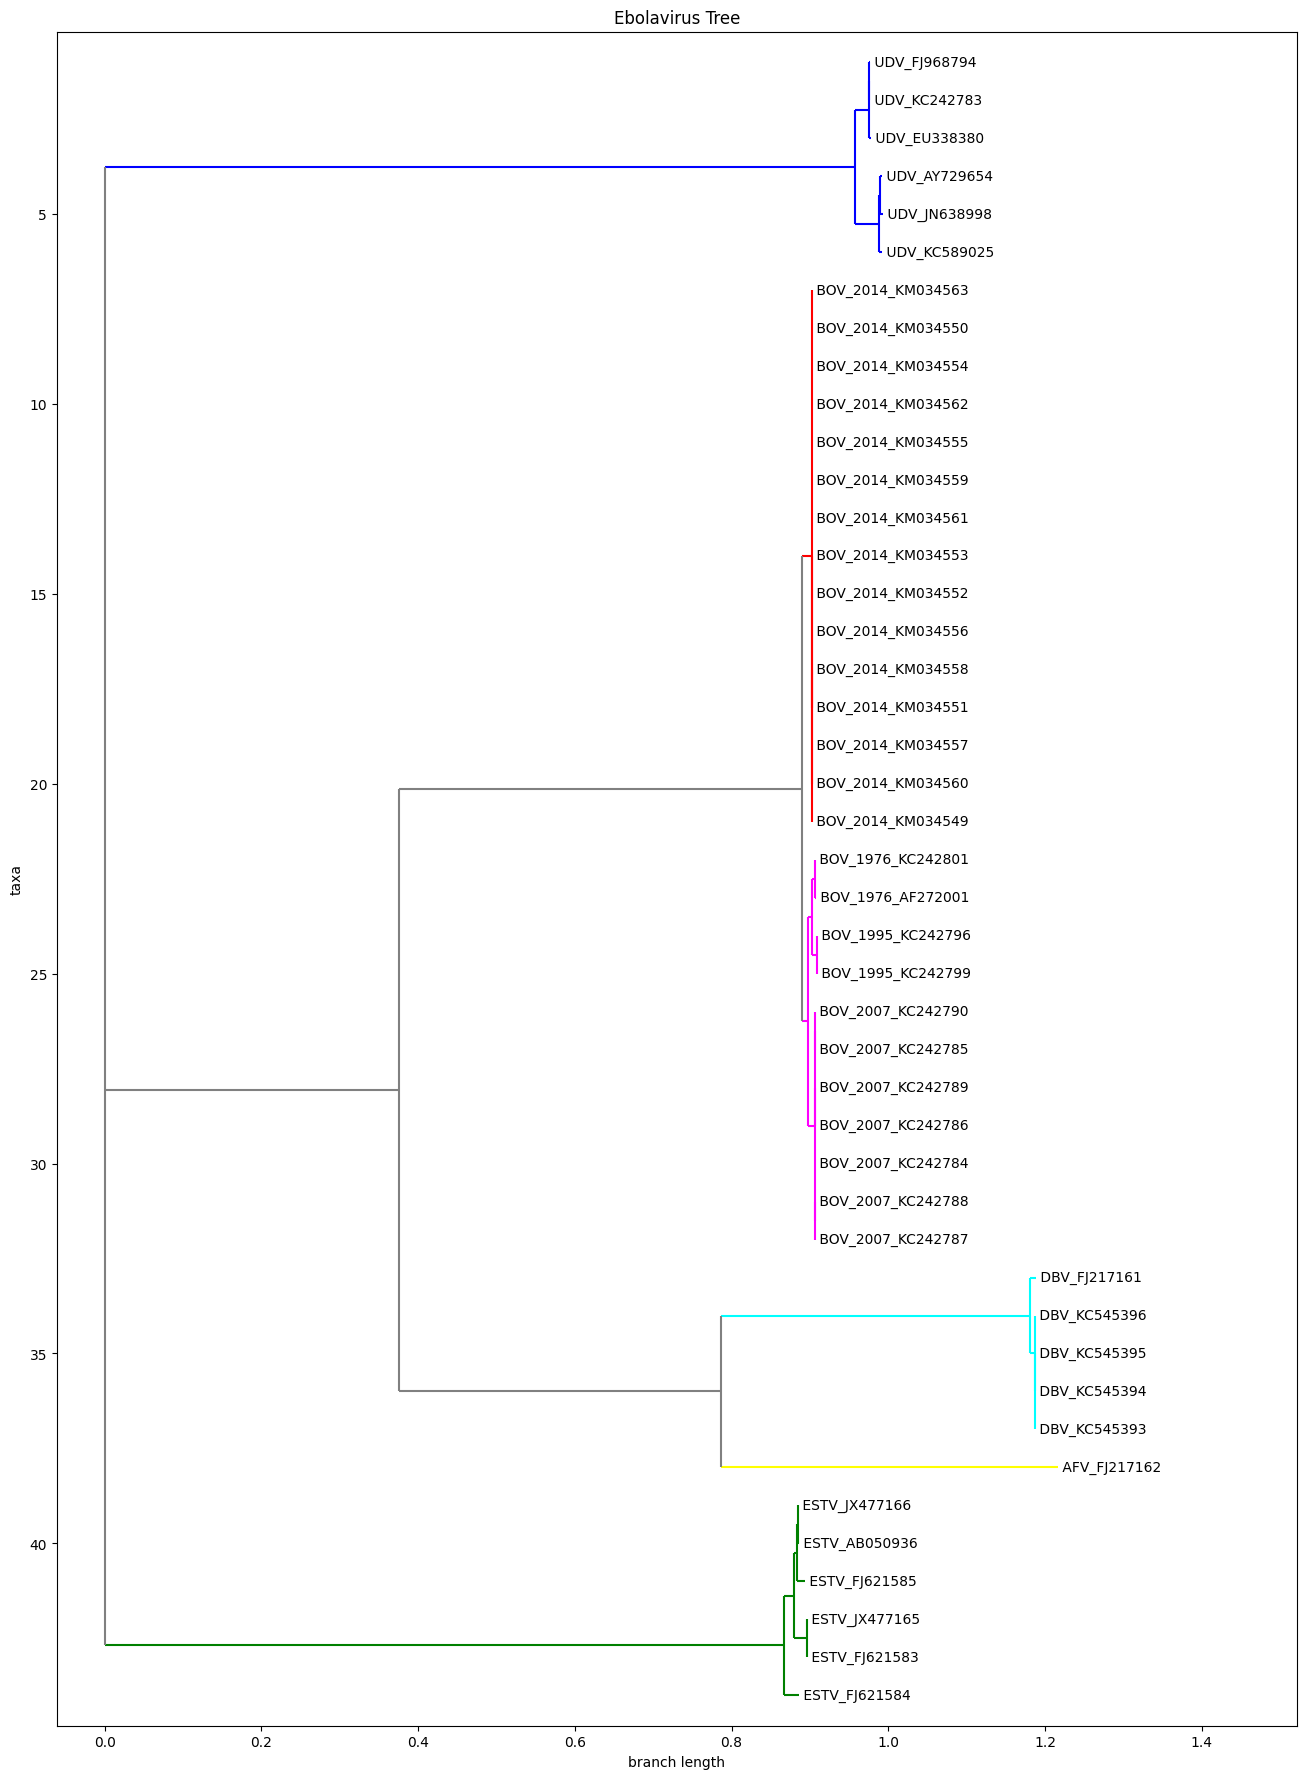

In [8]:
# 33.  Plot the complete dataset
fig = plt.figure(figsize=(16, 22)) 
ax = fig.add_subplot(111) 
from collections import OrderedDict 
my_colors = OrderedDict({ 
'EBOV_2014': 'red', 
'EBOV': 'magenta', 
'BDBV': 'cyan', 
'SUDV': 'blue', 
'RESTV' : 'green', 
'TAFV' : 'yellow' 
}) 

def get_color(name): 
    for pref, color in my_colors.items(): 
        if name.find(pref) > -1: 
            return color 
    return 'grey' 

def color_tree(node, fun_color=get_color): 
    if node.is_terminal(): 
        node.color = fun_color(node.name) 
    else: 
        my_children = set() 
        for child in node.clades: 
            color_tree(child, fun_color) 
            my_children.add(child.color.to_hex()) 
        if len(my_children) == 1: 
            node.color = child.color 
        else: 
            node.color = 'grey' 

ebola_color_tree = deepcopy(ebola_tree) 
color_tree(ebola_color_tree.root) 
Phylo.draw(ebola_color_tree, axes=ax, label_func=lambda x: x.name.split(' ')[0][1:] if x.name is not None else None) 

In [ ]:
## End of Notebook ##